In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
colnames=['day', 'time', 'tide']
df = pd.read_fwf(r'ASTR19_S22_group_project_data.txt', header=None, skiprows=(0,1,2), names=colnames)

npoints = 82
x = np.linspace(0.5, 41, npoints)

y = df['tide']
y_err = np.full(82,.25)

from scipy import optimize

def f_line(x, a, b, c, d, e, f):
    return a*np.sin(b*x + c)*np.sin(d*x + e) + f

params, params_cov = optimize.curve_fit(f_line,x,y,p0=[4,np.pi/15,np.pi/2,2*np.pi,1.0,2.0])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]

print(a_fit, b_fit, c_fit, d_fit, e_fit, f_fit)

y_fit = a_fit*np.sin(b_fit*x + c_fit)*np.sin(d_fit*x + e_fit) + f_fit

3.1336875546719023 0.123381770237365 4.296168953471263 6.20542882564725 1.292518863250685 2.462052527862303


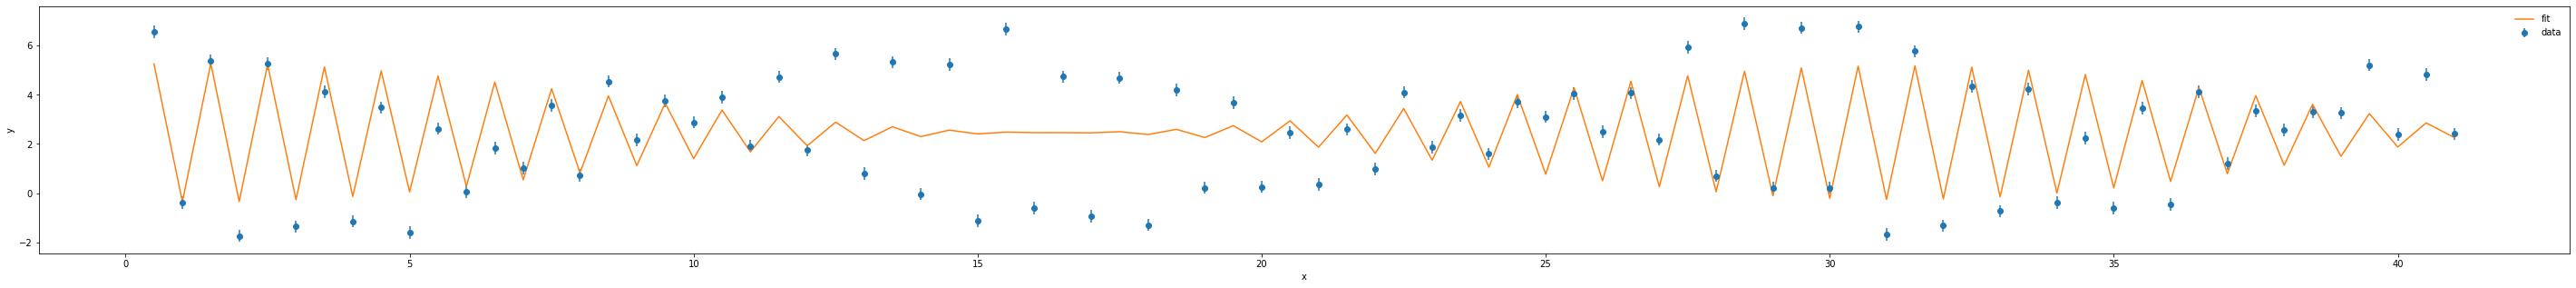

In [3]:
f = plt.figure(figsize=(50,5))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')

plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)

In [4]:
mpoints = 83
x2 = np.linspace(0.5, 41.5, mpoints) 

y2 = np.copy(y)

y3_err = np.full(83,.25)

Tsunami = np.max(y) + 2

print("The magnitude of the Tsunami is: ",Tsunami)

The magnitude of the Tsunami is:  8.89


[ 6.57 -0.39  5.38 -1.74  5.26 -1.36  4.13 -1.15  3.48 -1.61  2.62  0.05
  1.83  1.01  3.57  0.73  4.54  2.17  3.76  2.88  3.9   1.92  4.73  1.74
  5.66  0.79  5.33 -0.04  5.23 -1.12  6.67 -0.61  4.74 -0.93  4.69 -1.29
  4.2   0.22  3.68  0.26  2.47  0.36  2.59  0.99  4.1   1.87  3.17  1.6
  3.71  3.1   4.04  2.49  4.07  2.18  5.93  0.7   6.89  0.21  6.72  0.22
  6.77 -1.68  5.77 -1.32  4.35 -0.73  4.23 -0.38  2.24 -0.61  3.45 -0.46
  4.13  1.21  3.34  2.58  3.32  3.26  5.21  2.39  4.83  2.41  8.89]


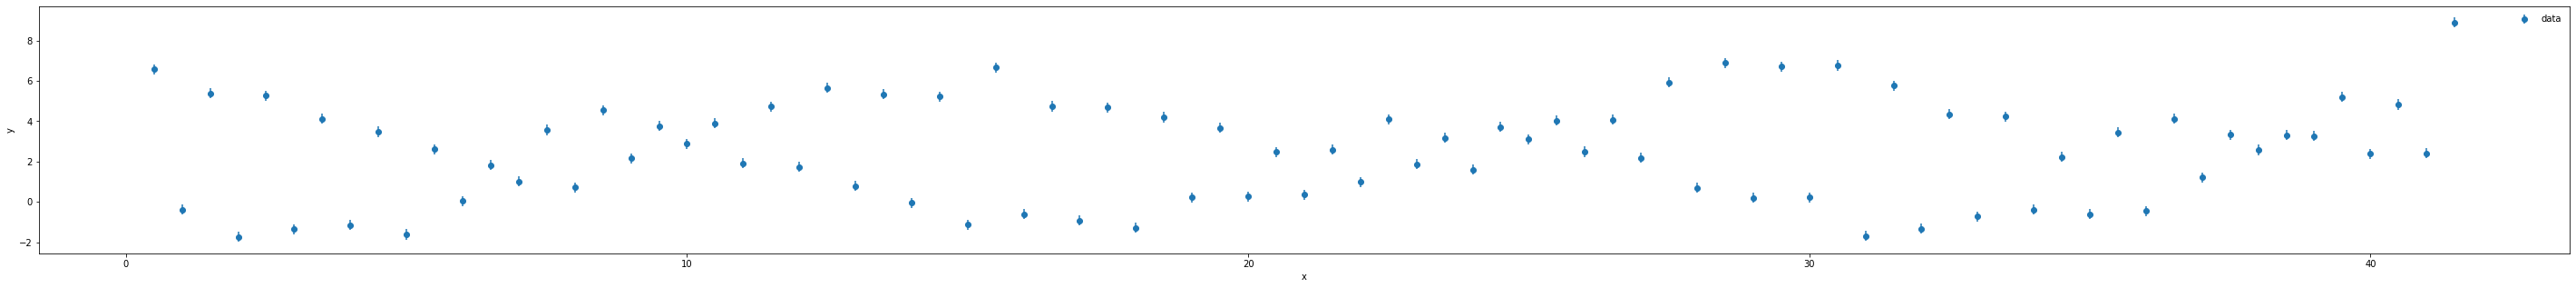

In [5]:
y3 = np.append([6.57, -0.39, 5.38, -1.74, 5.26, -1.36, 4.13, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.9, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.2, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.1, 1.87, 3.17, 1.6, 3.71, 3.1, 4.04, 2.49, 4.07, 2.18, 5.93, 0.7, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77, -1.32, 4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41], [8.89])

print(y3)

f = plt.figure(figsize=(50,5))
plt.errorbar(x2,y3,yerr=y3_err,fmt='o',label='data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0,frameon=False)